# Fine-Tune YOLOv12n

## Environment setup

### Step 1: Install Dependencies

We install the required packages:
- `ultralytics`: Official package to use YOLO models including the new YOLOv12.
- `supervision`: A toolset for evaluating and visualizing object detection results.

In [ ]:
!pip install -qU ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.8 MB/s eta 0:00:00


### Step 2: Set Working Directory

In [ ]:
import os
import locale
import supervision as sv
from IPython.display import Image
from ultralytics import YOLO
from google.colab import drive
from supervision import Detections
from supervision.metrics import MeanAveragePrecision
# Mount Google Drive
drive.mount('/content/drive')
HOME = os.getcwd()
print(HOME)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
/content


In [ ]:
dataset_location = "/content/drive/MyDrive/Capstone4"

In [ ]:
!ls {dataset_location}

data1.yaml  Extract_Zip.ipynb	 README.roboflow.txt  train1.zip  valid
data.yaml   Model_YOLOv12.ipynb  test		      train2
data.zip    README.dataset.txt	 train1		      train2.zip


In [ ]:
!cat {dataset_location}/data.yaml

train: ../train1/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['bus', 'car', 'van', 'motorcycle', 'truck']

roboflow:
  workspace: personal-project-kej16
  project: vehicle-detection-vznzd-dkl8g
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/personal-project-kej16/vehicle-detection-vznzd-dkl8g/dataset/1

### Step 3: Download Pretrained YOLOv12 Weights

Downloads a pretrained YOLOv12 nano model (`yolov12n.pt`) to be fine-tuned.

In [ ]:
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt

--2025-11-07 09:10:58--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/99db71db-0946-4c10-94a0-b54baf471037?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-07T09%3A59%3A13Z&rscd=attachment%3B+filename%3Dyolov12n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-07T08%3A58%3A57Z&ske=2025-11-07T09%3A59%3A13Z&sks=b&skv=2018-11-09&sig=HAFxFsZztACKUpomG7nNptBmX8Vzny6iDgbnoUn%2FszY%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MjUwNjk1OCwibmJmIjoxNzYyNTA2NjU4LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNv

### Step 4: Load Pretrained YOLO Model

Initializes the YOLO model using the downloaded weights.

In [ ]:
model = YOLO('yolov12n.pt')

### Step 5: Train the Model

In [ ]:
save_dir = "/content/drive/MyDrive/Capstone4/YOLO_Backups"
results = model.train(
    data=f'{dataset_location}/data.yaml',  # Path to dataset config
    epochs=40,
    batch=16,
    imgsz=640,
    project=save_dir,         # Save all results here
    name='run1',              # Folder name inside /yolo_backups (e.g. yolo_backups/run1)
    exist_ok=True,            # Allow overwriting existing run folder
    patience=5,               # Early stopping
    save_period=1,            # Save every 5 epochs
    val=True,                 # Validate during training
    verbose=True,             # Show details
    flipud=0.0,               # Data augmentation (vertical flip)
)


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Capstone4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=T

## Evaluation

### Step 6: Post-training Setup

Fix for character encoding and display directory structure for output artifacts.

In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"
run_name = "run1"

# List everything YOLO saved in Drive
!ls {save_dir}/{run_name}/

args.yaml			 results.csv	       val_batch0_labels.jpg
BoxF1_curve.png			 results.png	       val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxPR_curve.png			 train_batch17310.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch17311.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch17312.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg      weights
labels.jpg			 train_batch2.jpg


### Step 7: Visualize Training Results

Display the confusion matrix and training result curves from the YOLO training run. The confusion matrix: how well the model distinguishes between classes.

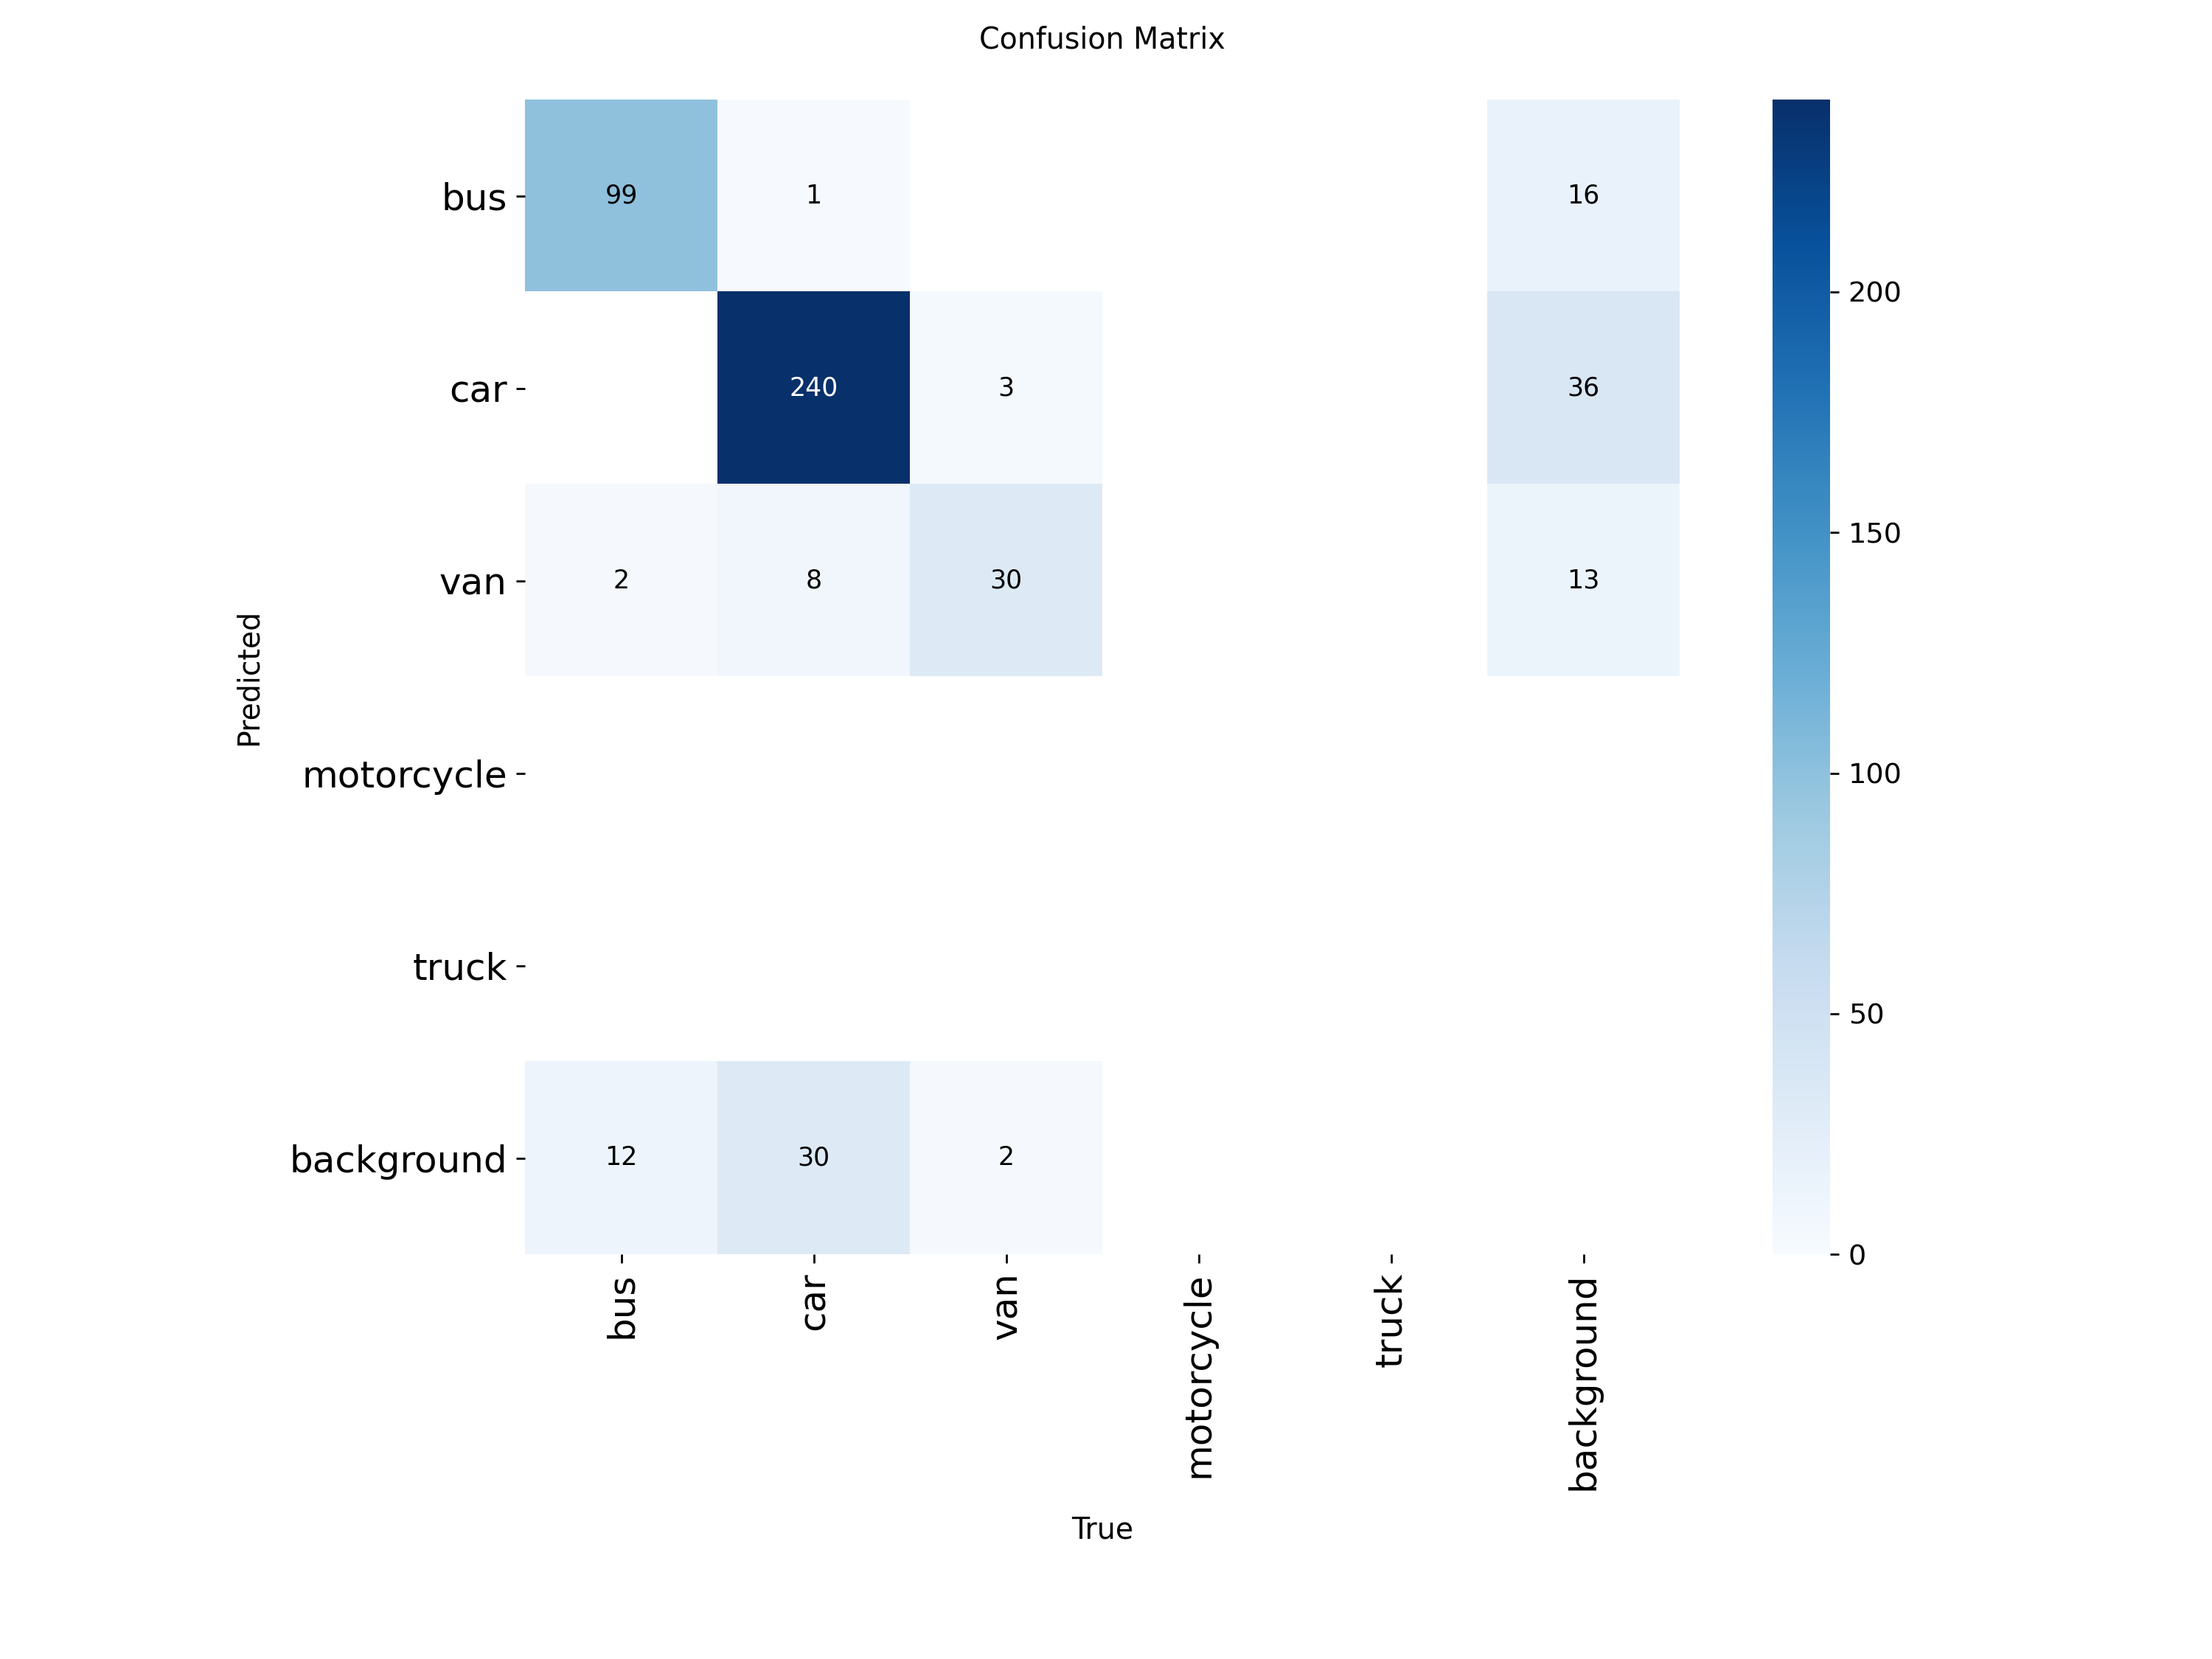

In [ ]:
# Display the confusion matrix from your Google Drive folder
Image(filename=f'{save_dir}/{run_name}/confusion_matrix.png', width=1000)

The training graph: loss, mAP, precision/recall over time.

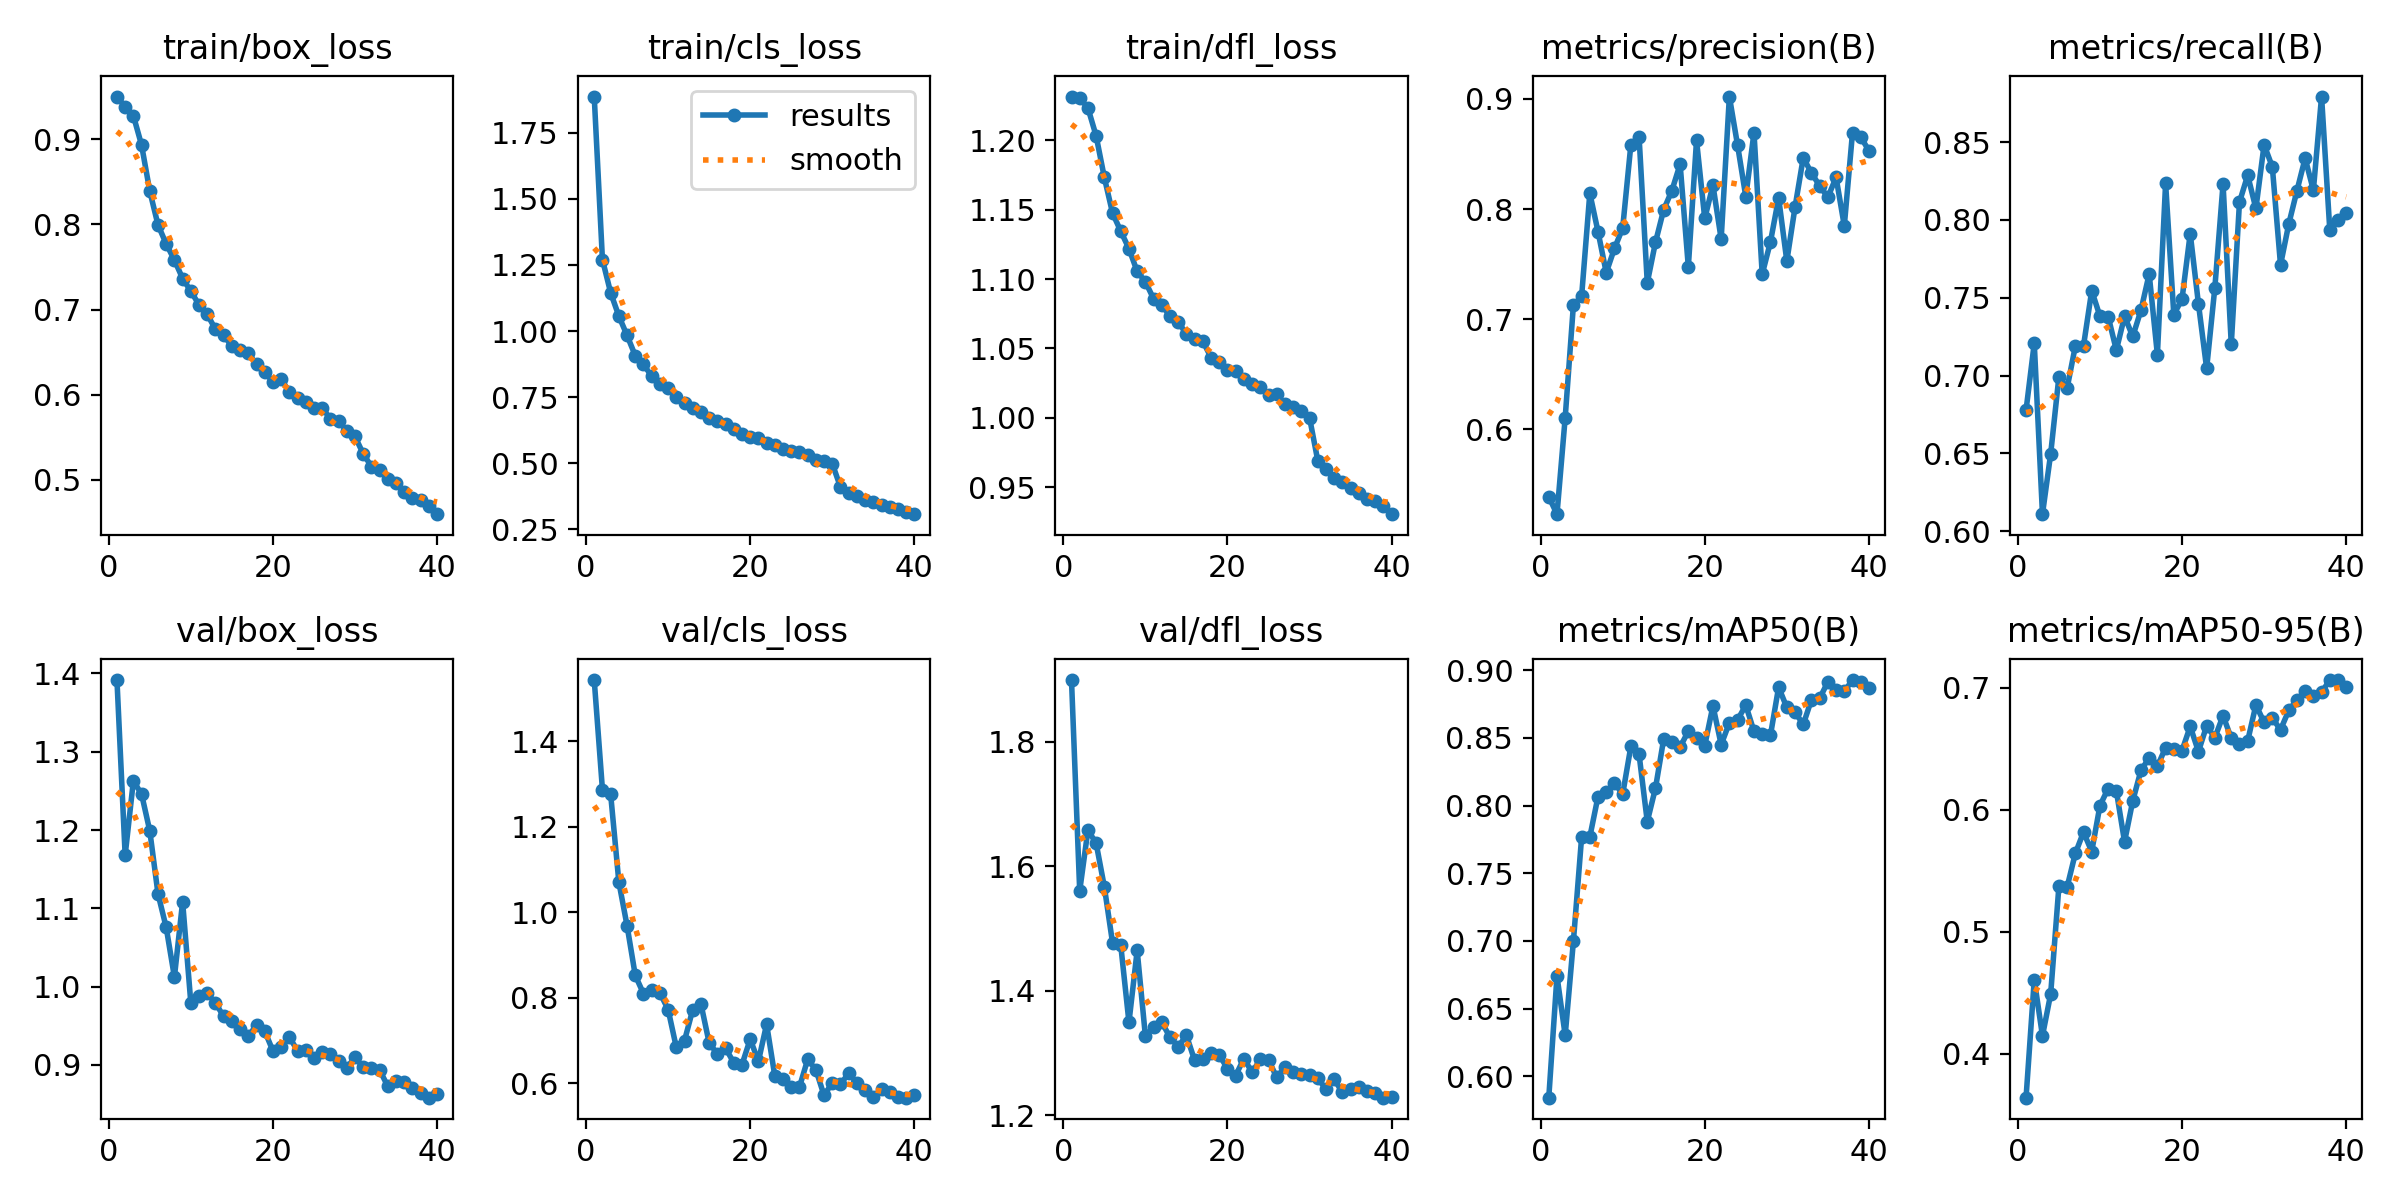

In [ ]:
Image(filename=f'{save_dir}/{run_name}/results.png', width=1000)

### Step 8: Load Test Dataset for Evaluation

Prepare test data using Supervision's dataset loader to evaluate model performance.

In [ ]:
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)
ds.classes

['bus', 'car', 'van', 'motorcycle', 'truck']

### Step 9: Compute Mean Average Precision

Evaluate the trained model using mAP metrics (50, 75, and 50:95).

In [ ]:
# === Load your trained YOLO model from Google Drive ===
model = YOLO(f"{save_dir}/{run_name}/weights/best.pt")

# === Initialize lists to collect predictions and ground truths ===
predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

# === Compute Mean Average Precision ===
map = MeanAveragePrecision().update(predictions, targets).compute()

The mAP metrics are printed and the results are plotted.

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.6632378557117644
mAP 50 0.8335502827335997
mAP 75 0.752551615502893


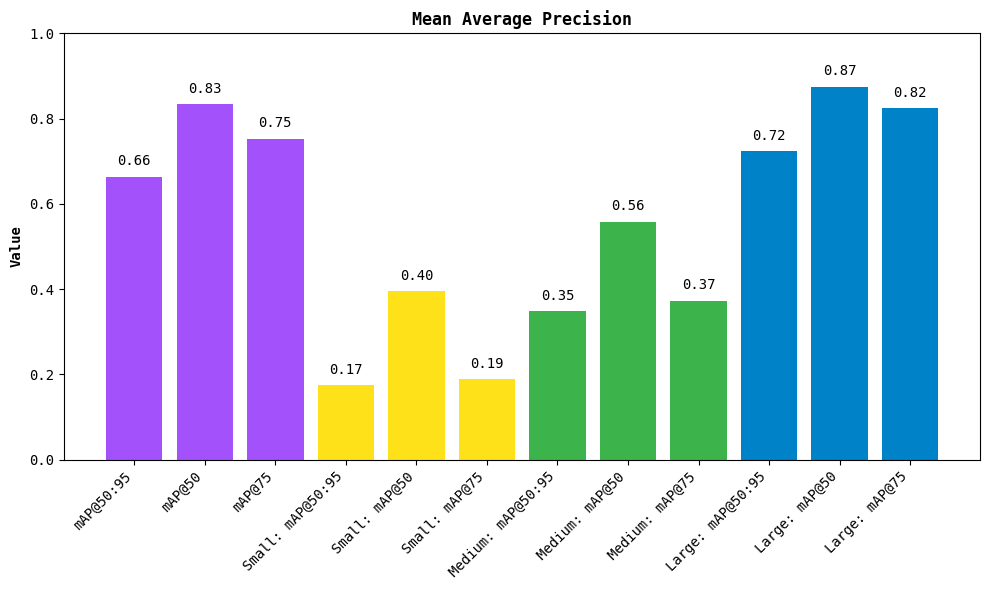

In [ ]:
map.plot()

### Step 13: Inference on Random Test Image

Run the trained model on a random test image and visualize detections.

- Picks a random image.
- Runs the trained YOLOv12 model.
- Applies NMS (Non-Max Suppression) to clean overlapping boxes.

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

`plot_image` displays the final annotated image with predicted bounding boxes and labels.

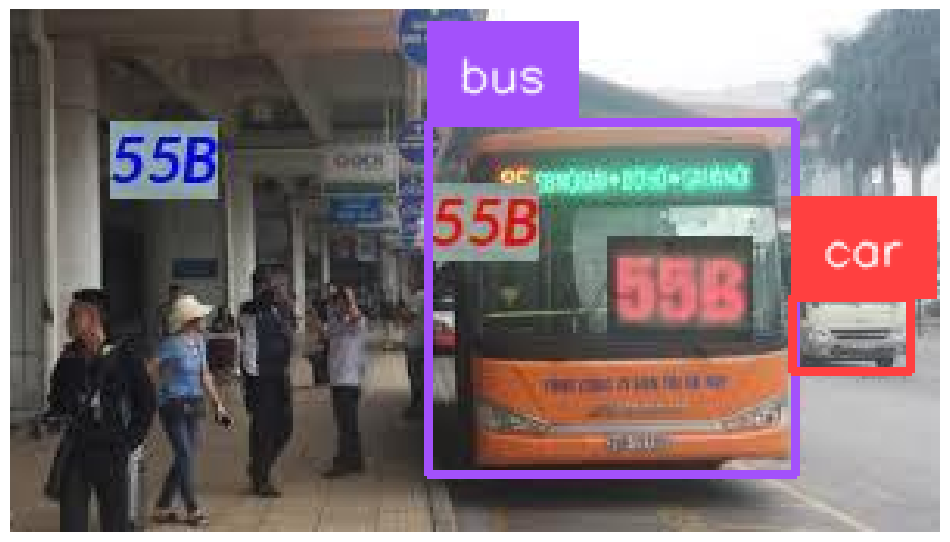

In [ ]:
sv.plot_image(annotated_image)

### 🔍 **Conclusion**

Over the course of 40 training epochs using YOLOv12n, the model showed consistent improvements in all performance metrics, including precision (P), recall (R), mean average precision at IoU=0.50 (mAP@50), and mean average precision across IoU thresholds (mAP@50-95).

#### 📈 Performance Summary:
- **Initial performance** (Epoch 1):  
  - mAP@50 = **0.396**, mAP@50-95 = **0.584**
- **Final performance** (Epoch 40):  
  - mAP@50 = **0.945**, mAP@50-95 = **0.887**
- **Validation with best.pt**:
  - Overall mAP@50 = **0.8335502827335997**


These results indicate a successful training process with high detection accuracy across all classes.

By reviewing the results of large, medium and small MAPs, our model is very good for classifying vehicles that have large object sizes. If our model is to be used for traffic CCTV purposes, it needs to be fine-tuned again with an image dataset that has a smaller object size. Dataset from CCTV itself.

#### ✅ Problem Solved:
This hands-on training addressed the problem of detecting three object categories — **bus**, **csr**, and **van** — in images. By fine-tuning the YOLOv12n model, we achieved strong object detection performance on a moderately sized dataset (9118 images).

The results demonstrate YOLOv12n's efficiency and capability in solving real-world object detection tasks with relatively fast training time (~0.77 hours) and low model size (5.5MB).

This experiment validates YOLOv12n as a suitable choice for lightweight, accurate object detection in constrained environments.